In [1]:
#!pip install torch torchvision
import torch
from torch import nn
from torch import optim

import numpy as np
from matplotlib import pyplot as plt

from torch.utils.data import Dataset
from torch.utils.data import DataLoader         
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

## Task 1: Linear case

Use perceptron to 

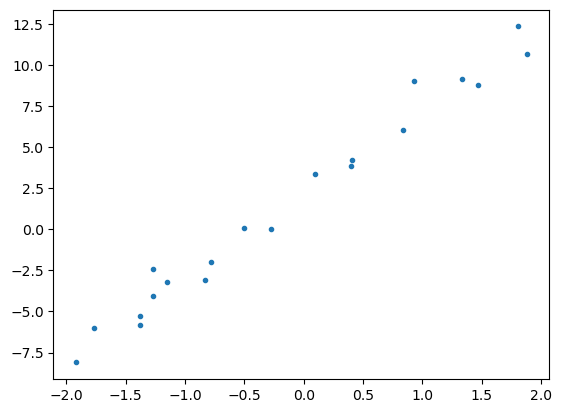

In [7]:
np.random.seed(42)
x_data = np.sort(-2. + 4. * np.random.rand(20))         # 20 samples (each are 1D), we need the matrix to be 20 x 1 before passing it to the model
y_data = 5. * x_data + 2.5 + np.random.randn(20)

plt.plot(x_data, y_data, '.')

# reshape x_data to 20 x 1
x = torch.tensor(x_data.reshape((20, 1))).float()            # 20 rows, -1 means it'll automatically detect
y = torch.tensor(y_data.reshape((20, 1))).float()

In [12]:
# TODO
model = nn.Linear(1, 1, bias = True)
y_pred = model(x)

num_epochs = 10000
optimizer = optim.SGD(model.parameters(), lr = 0.5)         # model.paramters() --> we're updating w0 and w1
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    y_pred = model(x)                                       # 1. Forward Pass (gives us the prediction)
    loss = criterion(y_pred, y)                             # 2. Compute the loss (between the prediction and actual)
                                                            #    Remember: we're doing gradient descent; the loss should decrease with each step
    optimizer.zero_grad()                                   # 3. Backward Pass & Optimization
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 500 == 0:
        print(f'\nEpoch [{epoch + 1} / {num_epochs}]')
        print('=================================')
        print(f'Forward Pass: h = {model} | Backward Pass: Derivatives = {model.bias.grad} {model.weight.grad} | Weights Update: w = {model.bias.detach().numpy()} {model.weight.detach().numpy()}')


Epoch [500 / 10000]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([-6.7055e-08]) tensor([[3.8547e-07]]) | Weights Update: w = [2.2412608] [[5.083189]]

Epoch [1000 / 10000]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([-6.7055e-08]) tensor([[3.8547e-07]]) | Weights Update: w = [2.2412608] [[5.083189]]

Epoch [1500 / 10000]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([-6.7055e-08]) tensor([[3.8547e-07]]) | Weights Update: w = [2.2412608] [[5.083189]]

Epoch [2000 / 10000]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([-6.7055e-08]) tensor([[3.8547e-07]]) | Weights Update: w = [2.2412608] [[5.083189]]

Epoch [2500 / 10000]
Forward Pass: h = Linear(in_features=1, out_features=1, bias=True) | Backward Pass: Derivatives = tensor([-6.7055e-08]) tensor([[3.

In [14]:
print('Model Weight: ', model.weight)
print('Model Bias: ', model.bias)

Model Weight:  Parameter containing:
tensor([[5.0832]], requires_grad=True)
Model Bias:  Parameter containing:
tensor([2.2413], requires_grad=True)


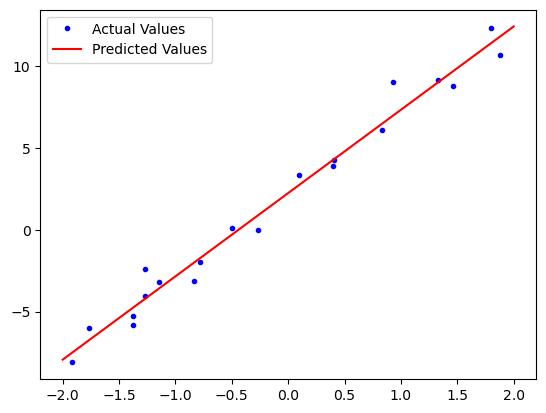

In [16]:
x_new = torch.linspace(-2, 2, 100).view(-1, 1)
y_new = model(x_new)

plt.plot(x_data, y_data, 'b.', label = 'Actual Values')
plt.plot(x_new, y_new.detach().numpy(),'r', label = 'Predicted Values')
plt.legend()

In [17]:
model = nn.Linear(1, 1, bias=True)
r = nn.ReLU()

print("model(x)\n", model(x))
print("\nOutput of Neural Network\n", r(model(x)))

model(x)
 tensor([[-2.3577],
        [-2.2345],
        [-1.9127],
        [-1.9126],
        [-1.8278],
        [-1.8226],
        [-1.7275],
        [-1.4683],
        [-1.4255],
        [-1.1945],
        [-1.0059],
        [-0.7009],
        [-0.4580],
        [-0.4499],
        [-0.0985],
        [-0.0198],
        [ 0.3103],
        [ 0.4211],
        [ 0.6989],
        [ 0.7620]], grad_fn=<AddmmBackward0>)

Output of Neural Network
 tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.3103],
        [0.4211],
        [0.6989],
        [0.7620]], grad_fn=<ReluBackward0>)


## Task 2: Non-Linear case

Design a 2 hidden layer neural network to predict the following synthetic dataset

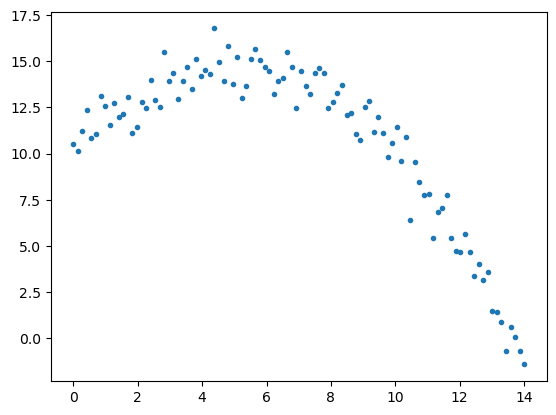

In [18]:
# Generate synthetic data for number of hours spend on video games vs happiness level
np.random.seed(42)
hours = torch.linspace(0, 14, 100).view(-1, 1) # 100 numbers between 0 and 14
happiness = 10 + 2 * hours + 0.2*np.random.normal(0, 5, 100).astype(np.float32).reshape(-1,1) - 0.2 * hours**2
x = hours
y = happiness

plt.plot(x, y, '.')

In [20]:
# TODO
# 2 hidden layers; each will have 6 neurons (for each neuron, we have a bias term), use ReLU for the function g in the hidden layers

class MyModel(nn.Module):                                 # nn.Module --> parent class
    def __init__(self):
        super(MyModel, self).__init__()

        # define the 3 layers
        self.layer1 = nn.Linear(1, 6, bias = True)        # input = x1, 6 outputs
        self.layer2 = nn.Linear(6, 6)                     # input = the 6 outputs from the previous layers, 6 output
        self.layer3 = nn.Linear(6, 1)                     # 6 inputs, 1 output

    def forward(self, x):                                 # override the forward method of nn.Module
        x = torch.relu(self.layer1(x))                    # applying non-linearity
        x = torch.relu(self.layer2(x))
        x = self.layer3(x)                                # we want negative outputs in the last layer, don't use relu
        
        return x

In [30]:
model = MyModel()

num_epochs = 10000
optimizer = optim.SGD(model.parameters(), lr = 0.001)
criterion = nn.MSELoss()

for epoch in range(num_epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1} / {num_epochs}] -- Loss: {loss.item():.4f}')

Epoch [500 / 10000] -- Loss: 8.4635
Epoch [1000 / 10000] -- Loss: 5.5825
Epoch [1500 / 10000] -- Loss: 4.0024
Epoch [2000 / 10000] -- Loss: 2.9464
Epoch [2500 / 10000] -- Loss: 2.3269
Epoch [3000 / 10000] -- Loss: 2.2465
Epoch [3500 / 10000] -- Loss: 1.9794
Epoch [4000 / 10000] -- Loss: 1.6170
Epoch [4500 / 10000] -- Loss: 1.4037
Epoch [5000 / 10000] -- Loss: 1.2233
Epoch [5500 / 10000] -- Loss: 1.0116
Epoch [6000 / 10000] -- Loss: 0.9917
Epoch [6500 / 10000] -- Loss: 1.0066
Epoch [7000 / 10000] -- Loss: 0.9799
Epoch [7500 / 10000] -- Loss: 0.9546
Epoch [8000 / 10000] -- Loss: 0.8885
Epoch [8500 / 10000] -- Loss: 0.9127
Epoch [9000 / 10000] -- Loss: 0.8863
Epoch [9500 / 10000] -- Loss: 0.8023
Epoch [10000 / 10000] -- Loss: 0.8459


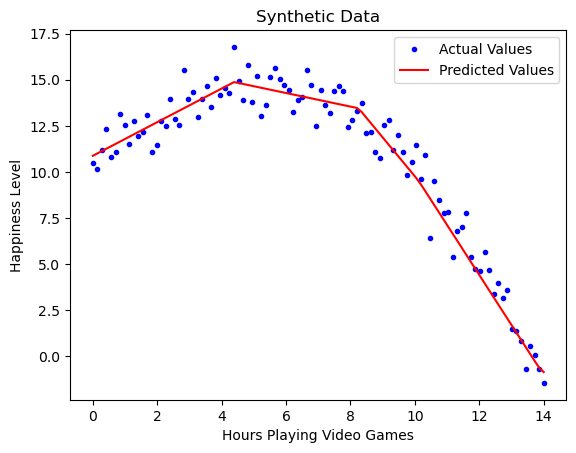

In [31]:
plt.plot(x, y, 'b.', label = 'Actual Values')

out = model.forward(x)
plt.plot(x, out.detach().numpy(), 'r', label = 'Predicted Values')
plt.xlabel('Hours Playing Video Games')
plt.ylabel('Happiness Level')
plt.title('Synthetic Data')
plt.legend()

#### Softmax Activation Function

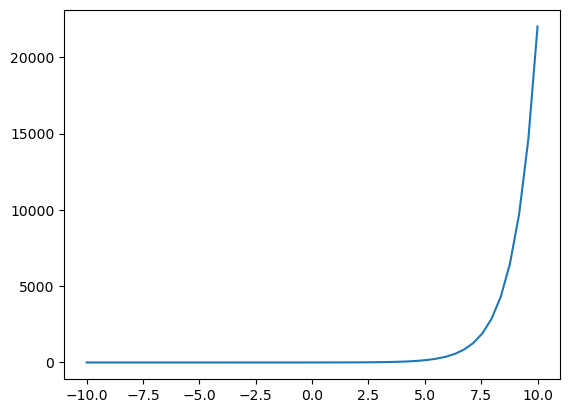

In [36]:
x = np.linspace(-10, 10)
y = np.exp(x)               # for each of these values, we'll compute the ouput
plt.plot(x, y)              # for negative values -- 0 and for positive values -- increases exponentially

# This is what softmax does -- it takes the exponent of the output and divides by the process C

## Task 3: MNIST Classification

Build a classifier to classify MNIST dataset

In [34]:
training_data = datasets.MNIST(
    root='~/Downloads/',
    train=True,
    download=True,
    transform=transforms.Compose([
              transforms.ToTensor()])
)                                     # download MNIST dataset, save it in the Downloads folder, we only want to get the training part
                                      # download = True --> download if it doesn't exist
                                      # transforms.ToTensor() --> convert each image in the PIL data type to Tensor
                                      # if you want to apply Gaussian Blur, flip the image, do some data augmentation --> all can be specified here 

# training_data[0] --> first image in the training dataset, prints as a tuple -- PIL image & its ground truth label which is 8 (for e.g.)
# training_data[0][0] --> display the actual image
# Above is assumed without the transforms.ToTensor() part

test_data = datasets.MNIST(
    root='~/Downloads/',
    train=False,
    download=True,
    transform=ToTensor()
)
batchsize = 64
train_dataloader = DataLoader(training_data, batch_size=batchsize, shuffle=True)        # accepts a dataset, specify the batch size, do you want to shuffle, etc.
test_dataloader = DataLoader(test_data, batch_size=8, shuffle=True)

100%|██████████| 9912422/9912422 [00:01<00:00, 9621005.12it/s] 


Extracting C:\Users\user/Downloads/MNIST\raw\train-images-idx3-ubyte.gz to C:\Users\user/Downloads/MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 3609203.40it/s]

Extracting C:\Users\user/Downloads/MNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\user/Downloads/MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 7319495.71it/s]


Extracting C:\Users\user/Downloads/MNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\user/Downloads/MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting C:\Users\user/Downloads/MNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\user/Downloads/MNIST\raw



In [39]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\user/Downloads/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [46]:
training_data[0][0]         # get X (image) of index 0
training_data[0][1]         # get Y (label) of index 0

5

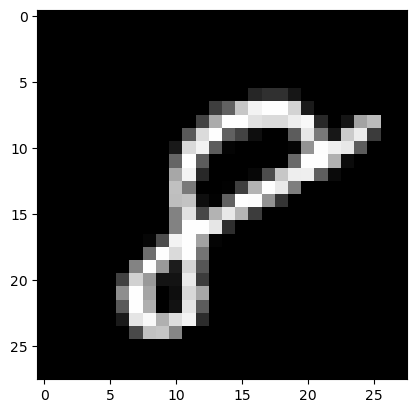

In [45]:
type(training_data[0])                                             # output --> tuple (x & y)
                                                                   #            x -- image, y -- label
training_data[0][0].shape                                          # output --> torch.Size([1, 28, 28]) -- 1 sample, image is 28 x 28
                                                                   #            if it was an RGB image, the output would be torch.Size([1, 3, 28, 28])
plt.imshow(training_data[59999][0][0, :, :], cmap = 'gray')        # [0, :, :] --> need to give plt (28 x 28) and not (1 x 28 x 28) 
                                                                   # so we specify the first element as 0

In [47]:
data = next(iter(train_dataloader))     # make an iteration out of train_dataloader, we want to get the next batch of 64 images

In [51]:
len(data[0])                            # output: 64 --> number of samples
data[0].shape                           # output: torch.Size([64, 1, 28, 28]) --> 64 images, each image is 1 x 28 x 28
data[0].reshape(64, -1).shape           # output: torch.Size([64, 784]) --> need them in one feature vector to be fed into the neural network (Vectorize the image)
                                        #                                   can also use view(), which does the same thing as reshape
                                        #                                   view() is better because it's in place, reshape allocates extra space for the data

torch.Size([64, 784])

In [92]:
# TODO
class MyClassifier(nn.Module):                           # image is 28 x 28 pixels -- total number of features = 784
                                                         # I want to get probability values -- e.g., P( y = 0 | x )
    def __init__(self):
        super(MyClassifier, self).__init__()
        
        # define the neural network
        self.layer1 = nn.Linear(784, 10, bias = True)    # input is the 784 feature vectors, 10 outputs
        self.probability = nn.LogSoftmax(dim = 1)        # we want to have stable training, we don't want to use division

    def forward(self, x):
        x = self.layer1(x)
        x = self.probability(x)
        # x = torch.log_softmax(self.layer1(x), dim = 1)

        return x

In [95]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = MyClassifier()

criterion = nn.NLLLoss()            # use negative log likelihood loss function
optimizer = optim.SGD(model.parameters(), lr = 0.001)

J_history = []

# Train the neural network
num_epochs = 1000                   # pass through the dataset 1000 times, but we're doing it in a batch of 64
for epoch in range(num_epochs):
    running_loss = 0

    for i, data in enumerate(train_dataloader):
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        inputs = inputs.reshape(inputs.shape[0], -1)

        optimizer.zero_grad()

        # Forward Pass
        labels_pred =  model(inputs)
        loss = criterion(labels_pred, labels)

        # Backward Pass
        loss.backward()

        # Update Parameters
        optimizer.step()

        running_loss += loss.item()
    
        if i % 300 == 0:
            print(f'Epoch [{epoch + 1} / {num_epochs}] -- {i + 1} | Loss: {loss.item():.4f}')
    
    J_history += [running_loss]

Epoch [1 / 1000] -- 1 | Loss: 2.3226
Epoch [1 / 1000] -- 301 | Loss: 2.0266
Epoch [1 / 1000] -- 601 | Loss: 1.7577
Epoch [1 / 1000] -- 901 | Loss: 1.7196
Epoch [2 / 1000] -- 1 | Loss: 1.5884
Epoch [2 / 1000] -- 301 | Loss: 1.5878
Epoch [2 / 1000] -- 601 | Loss: 1.2495
Epoch [2 / 1000] -- 901 | Loss: 1.1910
Epoch [3 / 1000] -- 1 | Loss: 1.2338
Epoch [3 / 1000] -- 301 | Loss: 1.1956
Epoch [3 / 1000] -- 601 | Loss: 1.0189
Epoch [3 / 1000] -- 901 | Loss: 1.0249
Epoch [4 / 1000] -- 1 | Loss: 0.9441
Epoch [4 / 1000] -- 301 | Loss: 1.0267
Epoch [4 / 1000] -- 601 | Loss: 0.9535
Epoch [4 / 1000] -- 901 | Loss: 0.9545
Epoch [5 / 1000] -- 1 | Loss: 0.8871
Epoch [5 / 1000] -- 301 | Loss: 0.8702
Epoch [5 / 1000] -- 601 | Loss: 0.8003
Epoch [5 / 1000] -- 901 | Loss: 0.8101
Epoch [6 / 1000] -- 1 | Loss: 0.8856
Epoch [6 / 1000] -- 301 | Loss: 0.8380
Epoch [6 / 1000] -- 601 | Loss: 0.7001
Epoch [6 / 1000] -- 901 | Loss: 0.8423
Epoch [7 / 1000] -- 1 | Loss: 0.7926
Epoch [7 / 1000] -- 301 | Loss: 0.6862


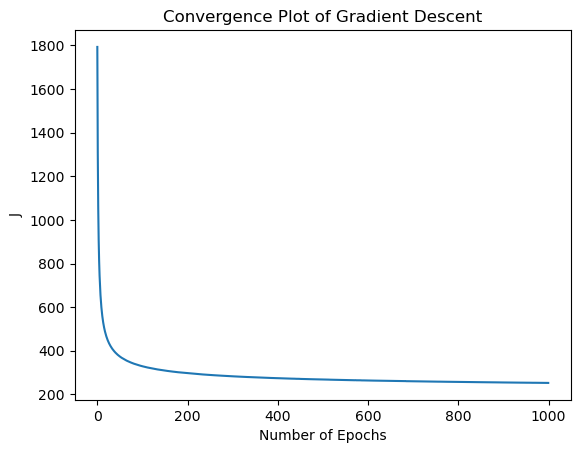

In [96]:
# plotting the convergence of gradient descent with respect to number of epochs
plt.plot(J_history)
plt.title('Convergence Plot of Gradient Descent')
plt.xlabel('Number of Epochs')
plt.ylabel('J')
plt.show()